In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
# Load the diabetes dataset.
ds = datasets.load_diabetes(as_frame=True)
print(f"The dataset contains the following information: {ds.keys()}")

# Check total number of rows and columns in the dataset.
print(f"Total number of samples inside data is '{ds.data.shape[0]}' and there are '{ds.data.shape[1]}' attributes to predict the '{ds.target.name}' column.", end="\n\n")

# Obtain a brief look of the dataset.
print(f"Visualize the first few samples: \n {ds.frame.head()}")

# (Optional) See dataset description.
# print(f"Dataset contextual information:\n {df.DESCR}")

The dataset contains the following information: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Total number of samples inside data is '442' and there are '10' attributes to predict the 'target' column.

Visualize the first few samples: 
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641 

In [59]:
# Efectuate the partition of the dataset into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size=0.2, random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training data shape: (353, 10)
Testing data shape: (89, 10)
Training target shape: (353,)
Testing target shape: (89,)


In [ ]:
# Define the model using the Tensorflow library.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output.
])

# Compile the model.
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'mse'])

# Train the model.
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model.
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss} \nTest MAE: {mae}")

# Save the trained model.
model.save('diabetes_model.keras')
# model.summary()

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 31591.9863 - mae: 158.3880 - mse: 31591.9863 - val_loss: 22467.2988 - val_mae: 134.0251 - val_mse: 22467.2988
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31040.7188 - mae: 156.7029 - mse: 31040.7188 - val_loss: 22437.5723 - val_mae: 133.9162 - val_mse: 22437.5723
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 32645.2070 - mae: 162.2119 - mse: 32645.2070 - val_loss: 22398.5391 - val_mae: 133.7728 - val_mse: 22398.5391
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 30957.4395 - mae: 156.7598 - mse: 30957.4395 - val_loss: 22345.0879 - val_mae: 133.5771 - val_mse: 22345.0879
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 33101.0000 - mae: 163.4632 - mse: 33101.0000 - val_loss: 22270.7773 - val_mae: 133.3059 - val_mse: 22270.7773
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 30295.0957 - mae: 154.0643 - mse: 30295.0957 - val_loss: 22169.1055 - val_mae: 132.9358 - val_mse: 22169.105

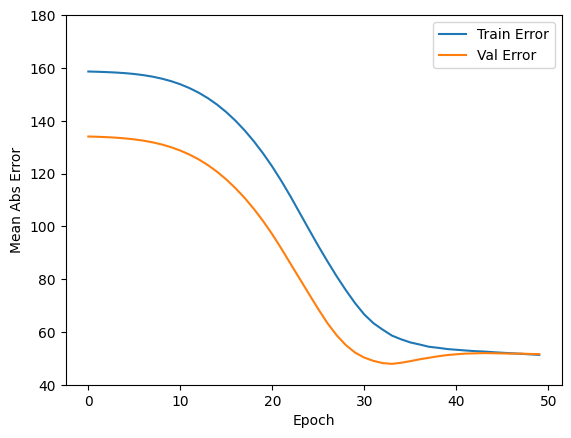

In [61]:
# Show the metrics obtained during traning process.
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([40,180])
  plt.legend()

plot_history(history)

Standard deviation of the real values: 72.78840394263774
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
R² (the model is better when closer to 1): 0.374634408293933


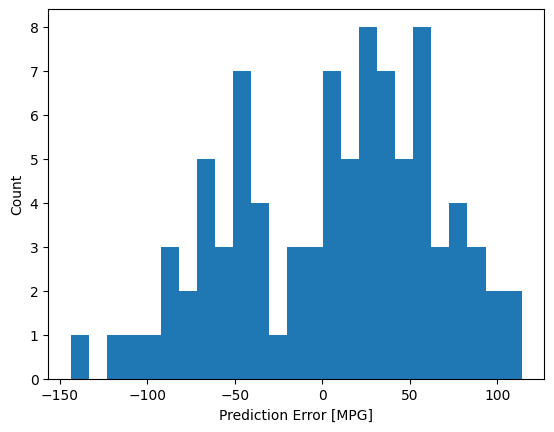

In [62]:
# Valorate the model performance.
std_dev = np.std(y_test)
print(f"Standard deviation of the real values: {std_dev}")

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² (the model is better when closer to 1): {r2}")

# Visualize the Gaussian error.
error = y_pred.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")